<a href="https://www.kaggle.com/code/robertmounce/wheel-fun-rentals-cleaning-and-analysis?scriptVersionId=215586085" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# My Time as a Bike Mechanic
![Bike Image](https://static.wixstatic.com/media/77b621_4761e9a32ca041bca2894c7f29a0935f~mv2.jpeg/v1/crop/x_0,y_837,w_3024,h_2358/fill/w_397,h_311,al_c,q_80,usm_0.66_1.00_0.01,enc_auto/05375D3F-A6B0-46E1-884F-1660C8F33D16.jpeg)


[WFR_Insights_Powerpoint](https://csulb-my.sharepoint.com/:p:/g/personal/robert_mounce01_student_csulb_edu/EXkFWLKfuAJOgx7BZte7lRUBCK2rHrRtxZpHZScmwQKRNA?e=g71fgG)
## North Orange County Wheel Fun Rentals Fleet Analysis
As the Head Mechanic and Assistant Area Manager, I led operations at the #1 Recreation Rentals company, as recognized by Entrepreneur Magazine for five consecutive years over the North Orange County locations. During my two-year tenure, I implemented a comprehensive product and inventory management system across four locations, managing 10 product types and over 300 total products. This system, operational from January 2020 to September 2021, generated over 400 reports. Despite having no prior mechanic experience, I and a part-time mechanic efficiently managed maintenance using Notion for data collection and the Chillipepper API for QR Code reporting. This allowed team members to provide real-time status updates on bike conditions across all locations.

# Project Overview
- Performed Cleaning Techniques
- Creating Columns for analysis including Date differences
- Analyzing outliers

# Data Engineering 

    This dataset was through a survey like form on a smartphone using categorical options to reduce errors in the dataset including Location, Product, and when the form was deleivered to Notion's database through a input form named Chilipepper.io it would capture the hour and minute. Through using the 

# Exploratory Data Summary


# Analysis
## 1. Analyze the frequency and types of bike repairs
    - Description world cloud
    - **Time series analysis of bike repair reports**
    - **Tire related reports **
    - **Chain related reports**
    - **Brake related reports**
    - **Top 20 Repairs**
- Evaluate the efficiency of the repair process
    - Histogram of how frequent bikes would break down after being fixed more than once and more than 4 times
    - Basic Statistics of how long bikes were down
Questions
Did we see a signfincant time in which bikes would be reported or maybe down and the trend.


- Identify trends and patterns in bike maintenance and repairs
    - Park Attendence to Report Correlation (-0.478)
    - Edinger and Yorba Linda hypothesis testing (No significance)
    - KPI: Mean Time to Repair (MTR)
    - KPI: Monthly Average Fixed Days
    - Odering trends
    
## Analysis Conclusions
1. Since implementing the online dashboard how has productivity performed?
   - The amount of time it took to fix products decreased by 83%
2. Correlation between OC Park attendance and locations during peak season.
   - Moderate Negative correlation (-0.478) between park attendence and reports 
       - This suggests that as park attendance increased, our team successfully reduced the number of reported issues. This indicates our proactive maintenance efforts were effective in keeping the equipment in good condition, even during peak visitor times.
3. Ranking of location repair statistics:
|Location  |      Average repair days       | Median of days|
|Yorba     |           20 days              |   6 days      | 
|Edinger   |           21 days              |   7 days      |
|Waterfront|           39 days              |   14 days     |
|Warner.   |           45 days              |    42 days    |
4. Most Prone Product to break 
    - Waterfront Single Surry #6
5. Time Series of Park Attendence




# Step 1 : Import Datasets

In [1]:
import numpy as np # linear algebra
import pandas as pd
pd.set_option('display.max_columns', None)
import os
import warnings
from scipy import stats
import datetime
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import re
import regex as re
from sklearn import preprocessing 


In [2]:
df = pd.read_csv('/kaggle/input/wheelfun-database/MB_Reports.csv')

In [3]:
pk = pd.read_csv('/kaggle/input/wheelfun-database/Park_Attendence.csv')

# Step 2 : Data Exploration

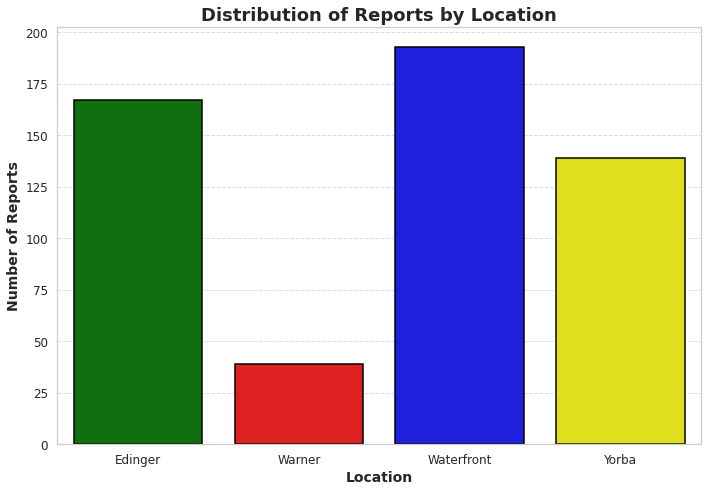

In [4]:
# Set a modern style
sns.set(style="whitegrid")

# Group by 'Location' and count the 'Description' column
grouped = df.groupby('Location')['Description'].count().reset_index()

# Rename the columns for clarity
grouped.columns = ['Location', 'Description_Count']

# Define custom colors for each location
custom_colors = {
    'Waterfront': 'blue',
    'Yorba': 'yellow',
    'Warner': 'red',
    'Edinger': 'green'
}

# Apply colors to each location based on the explicit location names in 'grouped'
colors = [custom_colors[location] for location in grouped['Location']]

# Plotting the column (bar) chart with enhancements
plt.figure(figsize=(10, 7))

# Create the barplot with custom colors, larger bars, and edge colors
sns.barplot(x='Location', y='Description_Count', data=grouped, palette=colors, edgecolor='black', linewidth=1.5)

# Add title and labels
plt.title('Distribution of Reports by Location', fontsize=18, weight='bold')
plt.xlabel('Location', fontsize=14, weight='bold')
plt.ylabel('Number of Reports', fontsize=14, weight='bold')

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

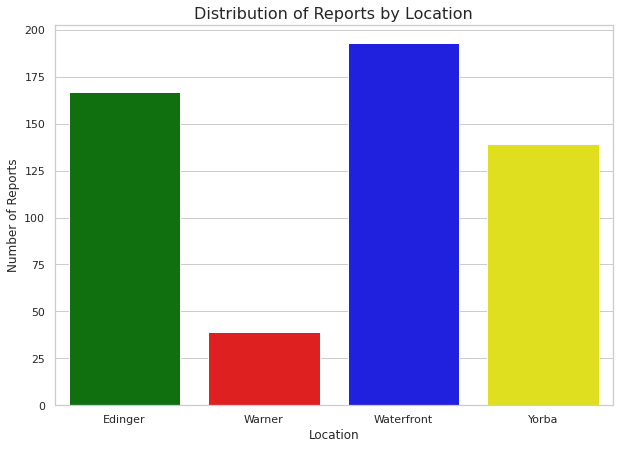

In [5]:
# Plotting the column (bar) chart
plt.figure(figsize=(10, 7))
sns.barplot(x='Location', y='Description_Count', data=grouped, palette=colors)

# Add title and labels
plt.title('Distribution of Reports by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Reports', fontsize=12)

# Show the plot
plt.show()

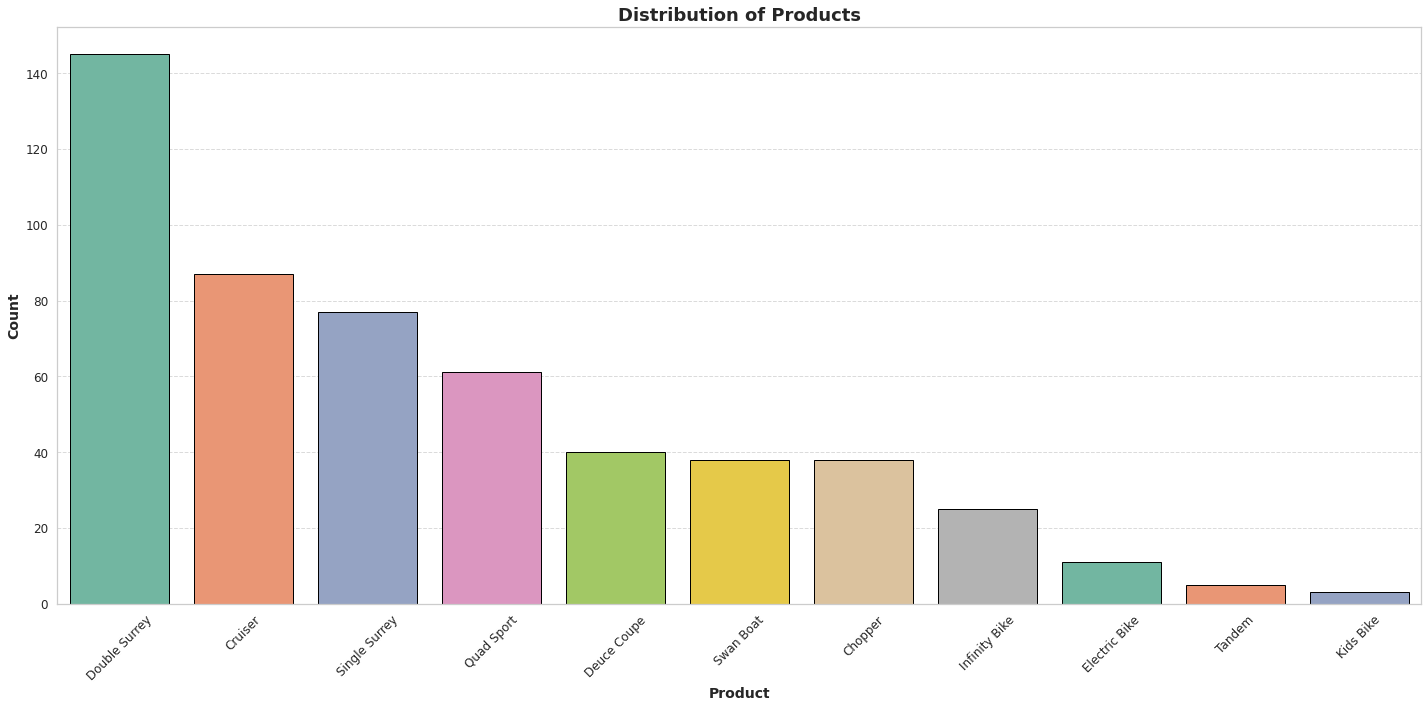

In [6]:
# Count the occurrences of each product
product_counts = df['Product'].value_counts()

# Extract labels and sizes for the bar chart
labels = product_counts.index
sizes = product_counts.values

# Set the figure size
plt.figure(figsize=(20, 10))

# Plotting the bar chart
sns.barplot(x=labels, y=sizes, palette='Set2', edgecolor='black')

# Add title and labels
plt.title('Distribution of Products', fontsize=18, weight='bold')
plt.xlabel('Product', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')

# Customize ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
# Taking a look at the beginning of the data
df.head()

,Location,Down Date,Product,Description,Mechanic Notes,Attatchment feauture,Status,Part Comment,Product #,Reporter,Category,Last Edited,Last Edited by,Mechanic,1 st attempt date,Edinger Part,Warner Part,Waterfront Part,Yorba Part
0,Waterfront,10/6/2020,Electric Bike,Broken Mode Buttons,Need to find local seller to buy and get corpo...,Maintenance%20Board%20f707a518e7264cea97a5acf1...,Done,NaN,NaN,Rob,NaN,12/30/2020,Robert Mounce,NaN,NaN,NaN,NaN,NaN,NaN
1,Waterfront,10/6/2020,Infinity Bike,Needs new Spokes,Replaced 5 infinity rims (total up): 6/9 are u...,NaN,Done,NaN,NaN,Rob,NaN,12/30/2020,Robert Mounce,NaN,NaN,NaN,NaN,NaN,NaN
2,Waterfront,10/6/2020,Infinity Bike,Needs a kickstand,NaN,NaN,Done,NaN,NaN,Rob,NaN,12/30/2020,Robert Mounce,NaN,NaN,NaN,NaN,NaN,NaN
3,Waterfront,10/6/2020,Infinity Bike,Rear Shifting nut,Call max to know how to install,NaN,"Done, Received",NaN,NaN,NaN,NaN,1/16/2021,Robert Mounce,NaN,NaN,NaN,NaN,NaN,NaN
4,Edinger,10/6/2020,Tandem,Needs Bottom Bracket bolt,NaN,NaN,Done,NaN,NaN,NaN,NaN,12/30/2020,Robert Mounce,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Taking the bottom half of the data
df.tail()
# (Cleaning) Note: Null values 


,Location,Down Date,Product,Description,Mechanic Notes,Attatchment feauture,Status,Part Comment,Product #,Reporter,Category,Last Edited,Last Edited by,Mechanic,1 st attempt date,Edinger Part,Warner Part,Waterfront Part,Yorba Part
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Dropping Rows with null values 
df = df.dropna(subset=['Location','Product'])
df.isnull().sum()

Location                  0
Down Date                 0
Product                   0
Description               0
Mechanic Notes          413
Attatchment feauture    503
Status                   89
Part Comment            493
Product #               186
Reporter                134
Category                 85
Last Edited               0
Last Edited by            0
Mechanic                442
1 st attempt date       422
Edinger Part            530
Warner Part             524
Waterfront Part         528
Yorba Part              522
dtype: int64

In [10]:
#Renaming columns for better use cases ('Down Date' to 'Down_Date')
df = df.rename(columns = {"Down Date":"Down_Date",'Product #':'Product_Num','Last Edited':'Fixed_Date','Mechanic Notes':'Mechanic_Notes','1 st attempt date':'1stdate', 'Edinger Part':'EdingerPart', 'Warner Part':'Warnerpart', 'Waterfront Part':'WaterfrontPart',
       'Yorba Part':'YorbaPart','Part Comment':'PartComment','Attatchment feauture':'Pictures','Last Edited by':'Last_edited_by'})  
# Dropping unwanted columns 
df.drop(['Pictures','Last_edited_by','Reporter','EdingerPart', 'Warnerpart', 'WaterfrontPart', 'YorbaPart','1stdate'],axis=1, inplace=True)
# Sort values by Down_Date
df = df.sort_values('Down_Date')
# Capatalizing the first letter of the Description column
df['Description'] = df['Description'].str.capitalize()

In [11]:
# convert 'Location', 'Categorical', 'Product', and 'Status' columns to categorical data type
df['Location'] = df['Location'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Product'] = df['Product'].astype('category')
df['Status'] = df['Status'].astype('category')

# convert 'Down_Date', 'Fixed_Date', and '1stdate' columns to pandas datetime data type
df['Down_Date'] = pd.to_datetime(df['Down_Date'])
df['Fixed_Date'] = pd.to_datetime(df['Fixed_Date'])

# convert 'description' and 'Mechanic_Notes' columns to string data type
df['Description'] = df['Description'].astype(str)
df['Mechanic_Notes'] = df['Mechanic_Notes'].astype(str)

# convert 'mechanic' column to categorical data type
df['Mechanic'] = df['Mechanic'].astype('category')

# convert 'PartComment' column to string data type
df['PartComment'] = df['PartComment'].astype(str)
print('Cleaned Data Types')
df.dtypes

Cleaned Data Types


Location                category
Down_Date         datetime64[ns]
Product                 category
Description               object
Mechanic_Notes            object
Status                  category
PartComment               object
Product_Num               object
Category                category
Fixed_Date        datetime64[ns]
Mechanic                category
dtype: object

## Park Attendence Data

In [12]:
pk

,Park,Month,Year,Visitors/ Month,Visitors / day,Month (num),Mon/ Year
0,Mile Square Park,January,2019,"37,398",1206,1,1/ 2019
1,Yorba Linda Regional Park,January,2019,"38,890",1255,1,1/ 2019
2,Mile Square Park,Febraury,2019,"46,204",1490,2,2/ 2019
3,Yorba Linda Regional Park,Febraury,2019,"26,309",849,2,2/ 2019
4,Mile Square Park,March,2019,"58,555",1889,3,3/ 2019
...,...,...,...,...,...,...,...
67,Yorba Linda Regional Park,October,2021,"59,369",1915,10,10/ 2021
68,Mile Square Park,November,2021,"55,448",1789,11,11/ 2021
69,Yorba Linda Regional Park,November,2021,"36,373",1173,11,11/ 2021
70,Mile Square Park,December,2021,"37,580",1212,12,12/ 2021


In [13]:
pk.describe()

,Year,Visitors / day,Month (num)
count,72.000000,72.000000,72.000000
mean,2020.000000,1736.472222,6.500000
std,0.822226,647.525887,3.476278
min,2019.000000,183.000000,1.000000
25%,2019.000000,1367.250000,3.750000
50%,2020.000000,1758.000000,6.500000
75%,2021.000000,2205.250000,9.250000
max,2021.000000,3096.000000,12.000000


In [14]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Park             72 non-null     object
 1   Month            72 non-null     object
 2   Year             72 non-null     int64 
 3   Visitors/ Month  72 non-null     object
 4   Visitors / day   72 non-null     int64 
 5   Month (num)      72 non-null     int64 
 6   Mon/ Year        72 non-null     object
dtypes: int64(3), object(4)
memory usage: 4.1+ KB


In [15]:
#rename column
pk.rename(columns={'Mon/ Year': 'Mon/Year'}, inplace=True)
pk.rename(columns={'Visitors/ Month': 'Visitors/Month'}, inplace=True)
pk.rename(columns={'Visitors / day': 'Visitors/day'}, inplace=True)
# Convert 'Mon/Year' to datetime
pk['Mon/Year'] = pd.to_datetime(pk['Mon/Year'], format='%m/ %Y')
# Ensure 'Visitors/ Month' is treated as a string, remove commas, and convert to int64
pk['Visitors/Month'] = pk['Visitors/Month'].astype(str).str.replace(',', '').astype('int64')
# Convert Park to Categorical column
pk['Park'] = pk['Park'].astype('category')

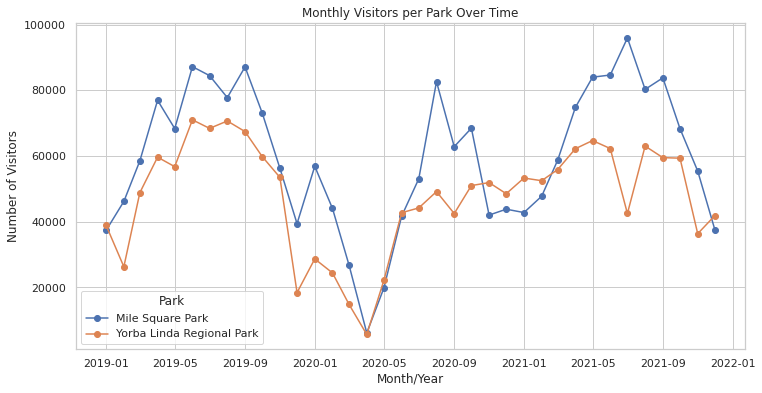

In [16]:
# Pivot the DataFrame to have months as the index and parks as columns
pivot_pk = pk.pivot(index='Mon/Year', columns='Park', values='Visitors/Month')

# Plotting the graph
plt.figure(figsize=(12, 6))
for park in pivot_pk.columns:
    plt.plot(pivot_pk.index, pivot_pk[park], marker='o', label=park)

# Customizing the plot
plt.title('Monthly Visitors per Park Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Number of Visitors')
plt.legend(title='Park')
plt.grid(True)

# Display the plot
plt.show()

# Step 3 : Data Cleaning
- [X] Renaming the Column Names
- [X] Dropping null values 
- [X] Change Data Types
- [X] Clean Category Column and Drop Routine Maintaince 
- [X] Categorize the Status Column
- [X] Clean the Category Column 
- [X] Clean Product_Number Column (product_num


## Category Report Column
The category column was reused for mechanics to complete routine check ups such as tightening chains for different locations, once complete the row would be unchecked weekly to be used again the next week
- [X] Replace Mechanics Attention and Mechanic to Down
    - Was used to precatch big problems before bikes were down
- [X] Fill Null values with Down 
    - The Null values was the start of the dataset with no category column till later when the API was later used
- [X] Drop maintainence routines and Cant Rent products


In [17]:
# What are the different categorizes
df['Category'].value_counts()
# I previously tried to address outliers, and maintaince tasks that would be reused each week as a mechanics weekly to do list. 


Down                   366
Maintaince              64
Mechanic                 9
Mechanics Attention      4
Cant rent                2
Name: Category, dtype: int64

In [18]:
# replace 'Mechanics attention' to 'Down'
df = df.replace('Mechanics Attention', 'Down')

# Replace Mechanic to Down
df= df.replace('Mechanic','Down')

# Fill null values with 'Down'
df['Category'] = df['Category'].fillna('Down')

# Dropping the outliers 
df = df[df['Category'] != 'Cant rent']

# Drop 'Maintenance' from weekly reoccuring tasks (float) being reassigned each week
df = df[df['Category'] != 'Maintaince']


## Product Number Column
- [X] Clean junk that isn't a number
- [X] Replace repair tag numbers to 0
- [X] Create a unique identifier
    - Set up sample for analysis later in specific bikes
    - template: Location/product/product_num
        - example: WaterfrontDouble_surrey5 or WFDS05


In [19]:
df['Product_Num'].value_counts()

1                       54
2                       39
4                       30
5                       26
6                       25
                        ..
1,2,13,14,12,11,10,6     1
Repair tag #7310         1
Repair tag #7314         1
Repair tag #7316         1
#6                       1
Name: Product_Num, Length: 71, dtype: int64

In [20]:
df['Product_Num'].isnull().sum()

126

In [21]:
# Dealing with null values of product numbers column due to some reports and products that didnt have the product numbers on them
print('Each location had product numbers. Example: (Chopper Edinger #3 was unique to location and product included)')
# Fill null values in the 'Product_Num' column with 0
df['Product_Num'] = df['Product_Num'].fillna(0)
df['Product_Num'].isnull().sum()
# Remove all non-digit characters
df['Product_Num'] = df['Product_Num'].str.extract('(\d+)', expand=False)

# Drop rows with NaN values resulting from extraction
df = df.dropna(subset=['Product_Num'])

# Convert the Product_Num column to integer
df['Product_Num'] = df['Product_Num'].astype(int)

# Dropping rows where Product_Num > 99 because they are repair tag numbers not the product_id
df = df[df['Product_Num'] <= 99]

# Display the value counts of the filtered Product_Num column
print(df['Product_Num'].value_counts())

Each location had product numbers. Example: (Chopper Edinger #3 was unique to location and product included)
1     56
2     39
4     30
5     28
6     26
3     24
8     15
9     14
7     14
10     8
0      5
11     3
17     3
12     2
13     1
46     1
50     1
Name: Product_Num, dtype: int64


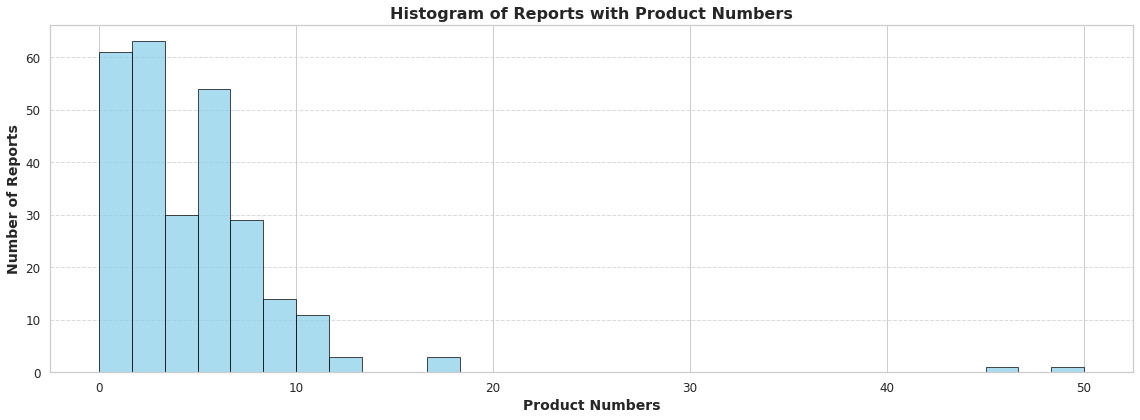

In [22]:
# Select rows where the 'Product_Num' column is not equal to '0'
numbered_products = df[df['Product_Num'] != '0']

# Create a figure and axis with a larger size
fig, ax = plt.subplots(figsize=(16, 6))

# Plot a histogram for 'Product_Num' with additional customization
numbered_products['Product_Num'].hist(ax=ax, bins=30, edgecolor='black', color='skyblue', alpha=0.7)

# Set axis labels and plot title with improved formatting
ax.set_xlabel('Product Numbers', fontsize=14, weight='bold')
ax.set_ylabel('Number of Reports', fontsize=14, weight='bold')
ax.set_title('Histogram of Reports with Product Numbers', fontsize=16, weight='bold')

# Customize ticks for better readability
ax.tick_params(axis='both', which='major', labelsize=12)

# Add gridlines to the y-axis for clarity
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot with tight layout to ensure no overlap
plt.tight_layout()
plt.show()

In [23]:
# Set Product_Num to 0 for repair tags at warner
df.loc[(df['Location'].str.contains('Warner')) & (df['Product_Num'] > 700), 'Product_Num'] = 0

# drop row where mulitple cruisers were worked since it was supposed to be maintaince and not down bikes
df.drop(df[(df['Location'].str.contains('Waterfront')) & (df['Product_Num'] > 20000)].index, inplace=True)

# the five outputs all have high number product numbers due to 
#transfers and based on the serial number  

# Step 4: Column Creations
- [X] Create a Year Month Column to categorize reports by month and year
- [X] Create a Fixed Days Column to find the number of days a product was down


## Year Month Column

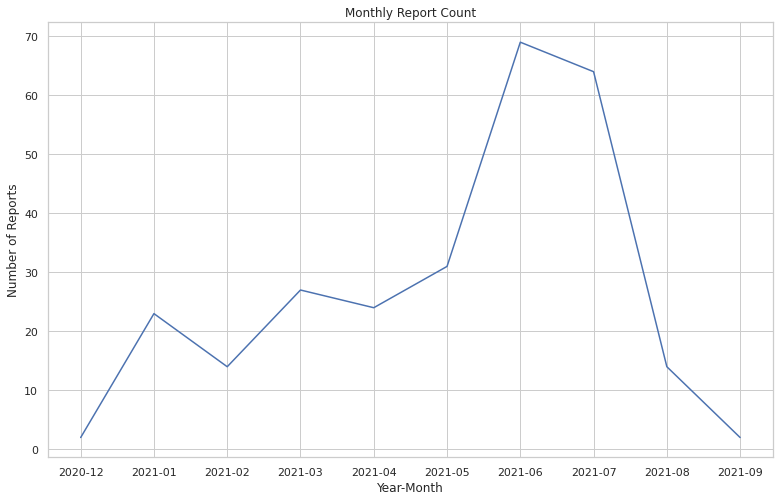

In [24]:
# Create a new column with the year and month extracted from the 'Date' column
df['YearMonth'] = df['Down_Date'].dt.strftime('%Y-%m')

# Group the data by year and month, and count the number of reports in each group
monthly_count = df.groupby('YearMonth')['Down_Date'].count()

# Plot the resulting data as a line graph
plt.figure(figsize=(13, 8))
plt.plot(monthly_count.index, monthly_count.values)

plt.xlabel('Year-Month')
plt.ylabel('Number of Reports')
plt.title('Monthly Report Count')
plt.show()


## Fixed Days Columns
In order to find out how long product was down creating this column subtracts the day the bycycle was fixed and the day it was report as being down. 

Text(0.5, 1.0, 'Count of Fixed Days Historgram')

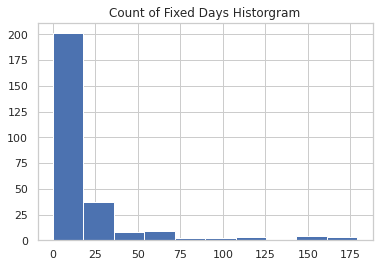

In [25]:
# Create a new column called 'fixed_days'
df['Fixed_Days'] = (df['Fixed_Date'] - df['Down_Date']).dt.days
df['Fixed_Days'].hist()
plt.title('Count of Fixed Days Historgram')

In [26]:
# Create a product_id column combining location, product, and product_num
df['product_id'] = df['Location'].astype(str) + '_' + df['Product'].astype(str) + '_' + df['Product_Num'].astype(str)


## Ordered Dataframe
- Can use this for further analysis to see how ordering parts has affected reports

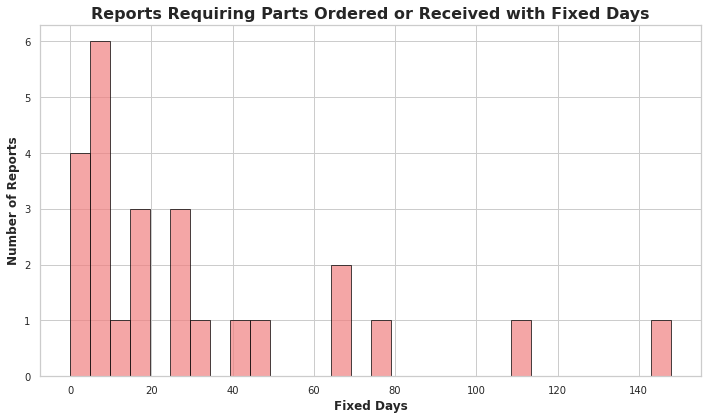

In [27]:
# Create a new DataFrame where the 'Status' column contains 'Order' or 'Received'
ordered_df = df[df['Status'].str.contains('Needs to be Ordered', case=False) | df['Status'].str.contains('Received', case=False) | 
                df['Status'].str.contains('Ordered', case=False)| df['Description'].str.contains('Needs', case=False)| df['Mechanic_Notes'].str.contains('Order', case=False)]

# Plot a histogram of 'Fixed_Days' for the filtered DataFrame
plt.figure(figsize=(10,6))
ordered_df['Fixed_Days'].hist(bins=30, edgecolor='black', color='lightcoral', alpha=0.7)

# Set title and axis labels
plt.title('Reports Requiring Parts Ordered or Received with Fixed Days', fontsize=16, weight='bold')
plt.xlabel('Fixed Days', fontsize=12, weight='bold')
plt.ylabel('Number of Reports', fontsize=12, weight='bold')

# Customize ticks for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# Step 5: Dealing With Outliers


There are 26 outliers in the Fixed_Days column:


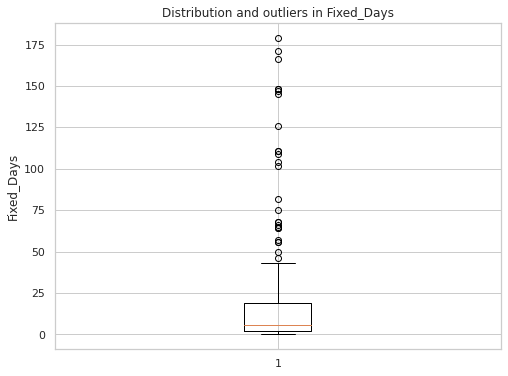

In [28]:
# Identify Outliers 
# Define a function to investigate outliers
def investigate_outliers(df, column):
    # Create a boxplot to visualize the distribution and outliers
    fig, ax = plt.subplots(figsize=(8,6))
    ax.boxplot(df['Fixed_Days'])
    ax.set_title(f"Distribution and outliers in {column}")
    ax.set_ylabel(column)

    # Calculate the upper and lower bounds for outliers
    q1 = df['Fixed_Days'].quantile(0.25)
    q3 = df['Fixed_Days'].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    # Count the number of outliers
    outliers = df[(df['Fixed_Days'] < lower_bound) | (df['Fixed_Days'] > upper_bound)]
    num_outliers = len(outliers)
    
    # Print the number of outliers and their details
    print(f"\nThere are {num_outliers} outliers in the {column} column:")

# Call the function to investigate outliers in the 'Days' column
investigate_outliers(df, 'Fixed_Days')


Text(0.5, 1.0, 'Identify Outliers over 35 days')

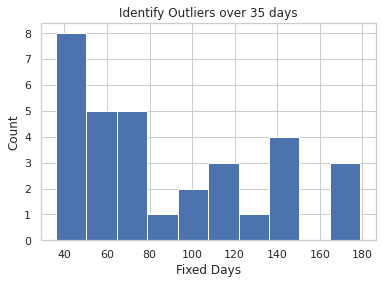

In [29]:
# Create a boolean mask to identify rows where Fixed_Days is over 35
mask = df['Fixed_Days'] > 35

# Use the mask to filter the original DataFrame and create a new variable
outliers = df[mask]

# Display the new variable
outliers['Fixed_Days'].hist()
plt.xlabel('Fixed Days')
plt.ylabel('Count')
plt.title('Identify Outliers over 35 days')


## Drop or Edit Outliers

In [30]:
outliers.describe()

,Product_Num,Fixed_Days
count,32.000000,32.000000
mean,5.531250,88.312500
std,4.032004,44.592374
min,0.000000,36.000000
25%,2.000000,54.500000
50%,5.000000,68.000000
75%,8.250000,114.750000
max,17.000000,179.000000


In [31]:
# Group by 'Location' and find the maximum value in 'Fixed_Days'
grouped = df.groupby('Location')['Fixed_Days'].max().reset_index()

# Rename the columns for clarity
grouped.columns = ['Location', 'Max_Fixed_Days']

print(grouped)

     Location  Max_Fixed_Days
0     Edinger             179
1      Warner              64
2  Waterfront             166
3       Yorba             171


# Step 6: Analysis
## Objective of Analysis
- Analyze the frequency and types of bike breakdowns
- Evaluate the efficiency of the repair process
- Identify trends and patterns in product reports
    
# Analysis Conclusions
## 1. Was the Maintenance Board help productivity?
   - Increasing the productivity by 83% 
   - Starting in November 2020, we reduced the weekly moving average repair time from approximately 150 days to within 50 to 0 days by March 2021. Throughout 2021, we maintained this average below 25 days even during peak summer months. See the Productivity section for more details.
   
## 2. Using OC Park attendence how did it correlate to Warner, Edinger and Yorba
    - 

## 3. Ranking of location repair stats 
    1. Yorba (Average of 20 days, Median of 6 days) 
    2. Edinger (Average of 21 days, Median of 7 days)
    3. Watefront (Average of 39 days, Median of 14 days)
    4. Warner (Average of 45 days, Median of 42 days) 

## 4. Demonstrate reoccuring problems? Flat Tires, broken wheels, etc.?
    - Flat Tires, Broken Chains were the most reported problems, see Description Word Plot for more details
    
## 5. How much did having to order a part affect the repair date of the products?


## 6. Using product_ids how do products behaves over time, dependent on attendence?

## 7. Weather Data
- Using Weather data particularly the wind speed in mile square park and Yorba linda Park did we see an increase of damages to our swan boats from crashing onto the sides of the pond?

## 8. COVID Relationship
- As we can see in the parks attendence there was a big gap from park attendence in Yorba Linda and Mile Square Park could there be a relationship between the relucant behvaior in going to Orqange COunty Parks with the rising COVID results, and how well did they do?


## **Productivity**
Monthly Average Fixed Days Over time
- We can see a decrease of a monthly average of around 95 days in January to an avaerage of 20 days during the summer months 

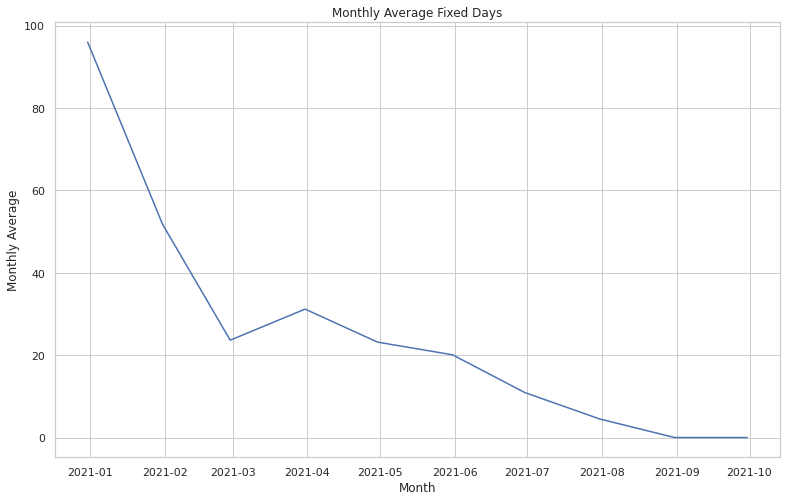

In [32]:
# group the data by month and calculate the average Days_to_Fix for each month
monthly_avg = df.groupby(pd.Grouper(key='Down_Date', freq='M'))['Fixed_Days'].mean()

# plot the time series
plt.figure(figsize=(13, 8))
plt.plot(monthly_avg)
plt.xlabel('Month')
plt.ylabel('Monthly Average')
plt.title('Monthly Average Fixed Days')
plt.show()

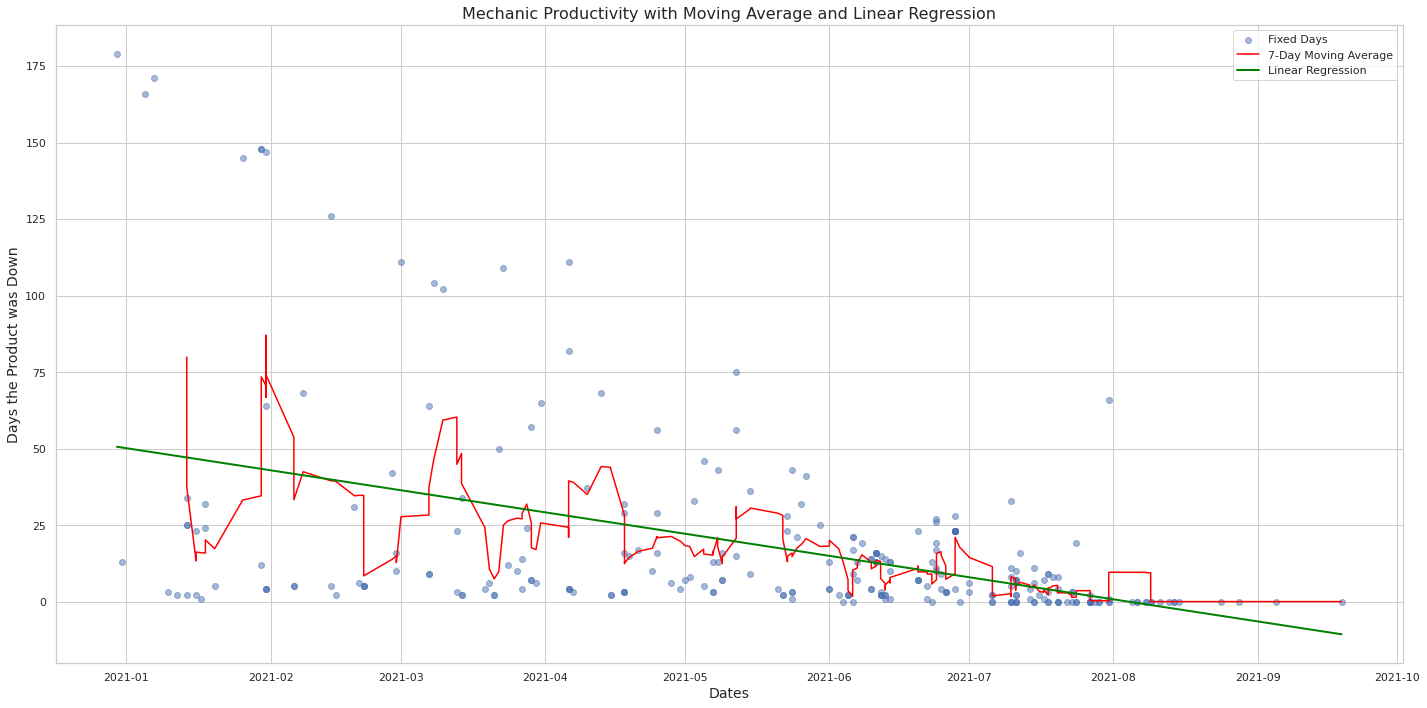

In [33]:
# Sort the dataframe by 'Down_Date'
df = df.sort_values('Down_Date')

# Calculate the moving average
window_size = 7  # Adjust the window size as needed
df['MovingAverage'] = df['Fixed_Days'].rolling(window=window_size).mean()

# Create the scatter plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(df['Down_Date'], df['Fixed_Days'], label='Fixed Days', alpha=0.5)

# Plot the moving average line
ax.plot(df['Down_Date'], df['MovingAverage'], color='red', label=f'{window_size}-Day Moving Average')

# Calculate the linear regression
# Convert 'Down_Date' to ordinal for regression, if it's a datetime object
df['Down_Date_ordinal'] = pd.to_datetime(df['Down_Date']).apply(lambda date: date.toordinal())

# Get the x and y values for the regression line
x = df['Down_Date_ordinal']
y = df['Fixed_Days']

# Perform linear regression using numpy
slope, intercept = np.polyfit(x, y, 1)

# Create the regression line
regression_line = slope * x + intercept

# Plot the linear regression line
ax.plot(df['Down_Date'], regression_line, color='green', label='Linear Regression', linewidth=2)

# Set labels and title
ax.set_xlabel('Dates', fontsize=14)
ax.set_ylabel('Days the Product was Down', fontsize=14)
ax.set_title('Mechanic Productivity with Moving Average and Linear Regression', fontsize=16)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
# Count the frequency of each Down_Date value and sort in descending order
date_counts = df['Down_Date'].value_counts().sort_values(ascending=False)
# Get the date with the highest count
busiest_date = date_counts.index[0]
# Count the number of reports for the busiest date
busiest_date_count = date_counts[0]
print(f"The busiest time of the year is {busiest_date} with {busiest_date_count} reports.")


The busiest time of the year is 2021-06-28 00:00:00 with 10 reports.


## General Stats

In [35]:
# Calculate average and median of whole dataset
average_fixed_days = df['Fixed_Days'].mean()
median_fixed_days = df['Fixed_Days'].median()
# Print results
print(f"Average of Fixed_days: {average_fixed_days}")
print(f"Median of Fixed_days: {median_fixed_days}")
# North Orange County took 17 days on average to fix products, but the most common was 6 days

Average of Fixed_days: 17.68888888888889
Median of Fixed_days: 6.0


In [36]:
# Calculate average and median values by location 
grouped = df.groupby(['Location', 'Down_Date']).mean().reset_index()
average_by_location = grouped.groupby('Location')['Fixed_Days'].mean()
median_by_location = grouped.groupby('Location')['Fixed_Days'].median()
for location in df['Location'].unique():
    print(f"Location: {location}")
    print(f"Average fixed days: {average_by_location[location]}")
    print(f"Median fixed days: {median_by_location[location]}")
    print()

Location: Edinger
Average fixed days: 17.12272727272727
Median fixed days: 6.666666666666666

Location: Yorba
Average fixed days: 13.456639566395662
Median fixed days: 5.833333333333333

Location: Waterfront
Average fixed days: 26.378654970760234
Median fixed days: 13.0

Location: Warner
Average fixed days: 34.0
Median fixed days: 34.0



# Common Problems
Using the description column, we can use wordcloud to see what words are used most in the dataset, to get a picture of what were the main problems that team members reported

## Description Word Cloud

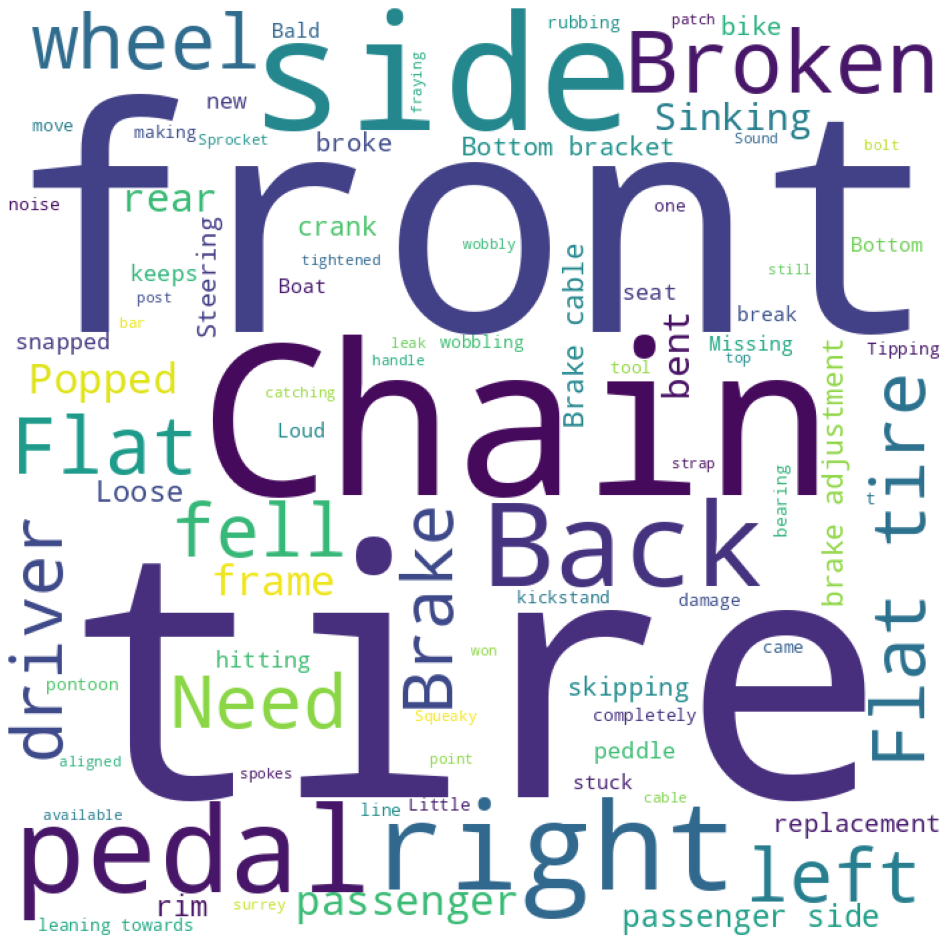

In [37]:
from wordcloud import WordCloud
all_words = ''
for arg in df["Description"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (13, 13), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## Tire Related Problems Overtime

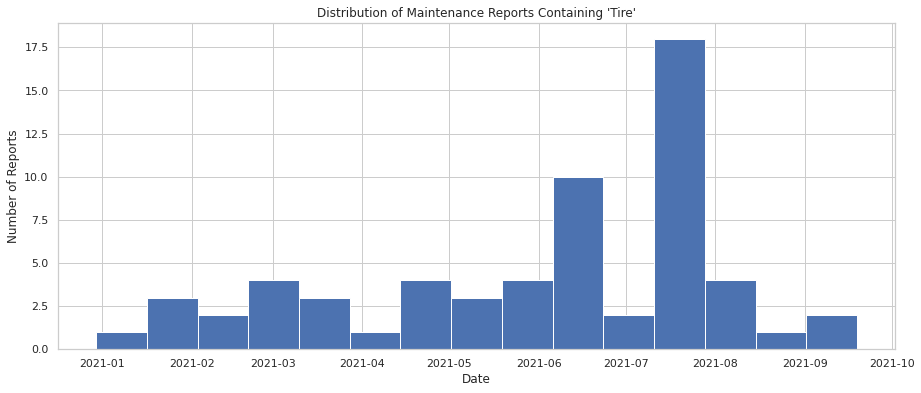

In [38]:
# Create a new column that contains a boolean value indicating whether the description contains the word "tire"
df["Has_Tire"] = df["Description"].str.contains("tire")

# Group the data by Down_Date and count the number of rows for each date that have a description containing the word "tire"
tire_counts = df.groupby("YearMonth")["Has_Tire"].sum()
# Create a histogram of the tire counts
fig, ax = plt.subplots(figsize=(15, 6))
ax.hist(df[df["Has_Tire"]]["Down_Date"], bins=15)
ax.set_title("Distribution of Maintenance Reports Containing 'Tire'")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Reports")
plt.show()

## Chain Related Problems Overtime

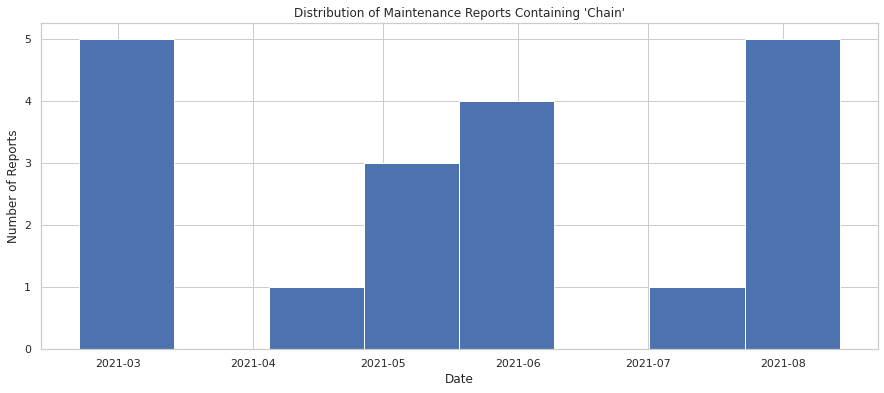

In [39]:
# Create a new column that contains a boolean value indicating whether the description contains the word "tire"
df["Has_Chain"] = df["Description"].str.contains("chain")

# Group the data by Down_Date and count the number of rows for each date that have a description containing the word "tire"
chain_counts = df.groupby("YearMonth")["Has_Chain"].sum()
# Create a histogram of the tire counts
fig, ax = plt.subplots(figsize=(15, 6))
ax.hist(df[df["Has_Chain"]]["Down_Date"], bins=8)
ax.set_title("Distribution of Maintenance Reports Containing 'Chain'")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Reports")
plt.show()

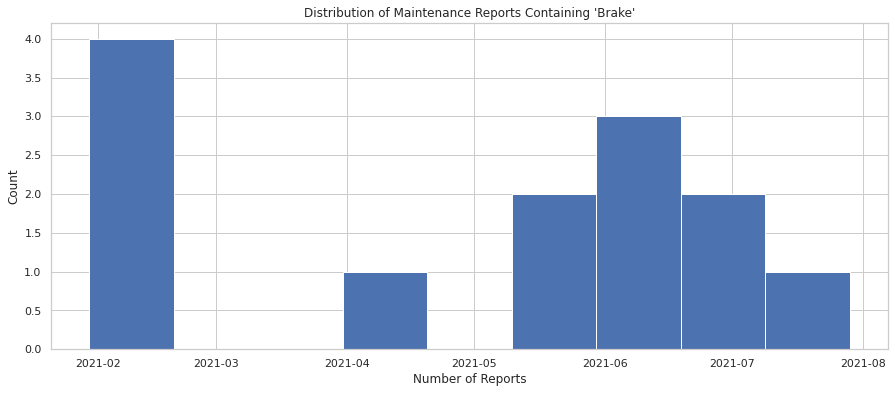

In [40]:
# Create a new column that contains a boolean value indicating whether the description contains the word "brake"
df["Has_Brake"] = df["Description"].str.contains("brake")

# Group the data by YearMonth and count the number of rows for each month that have a description containing the word "brake"
brake_counts = df.groupby("YearMonth")["Has_Brake"].sum()

# Create a histogram of the brake counts
fig, ax = plt.subplots(figsize=(15,6))
ax.hist(df[df["Has_Brake"]]["Down_Date"], bins=9)
ax.set_title("Distribution of Maintenance Reports Containing 'Brake'")
ax.set_xlabel("Number of Reports")
ax.set_ylabel("Count")
plt.show()


## How did Ordering parts affect products?
How much did having to order a part affect the repair date of the products

Text(0, 0.5, 'Frequency')

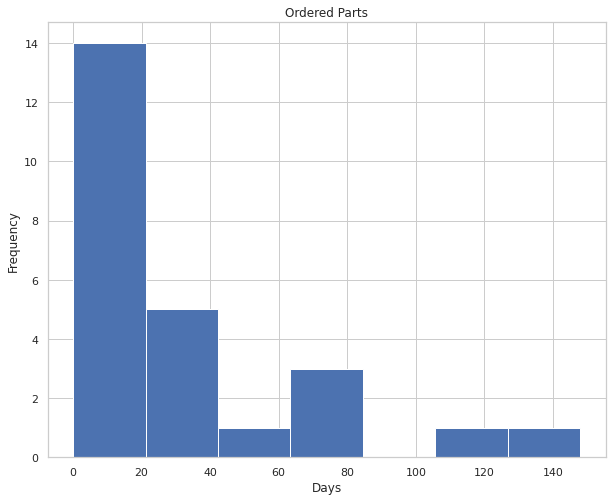

In [41]:
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(ordered_df['Fixed_Days'], bins=7)
ax.set_title("Ordered Parts")
ax.set_xlabel("Days")
ax.set_ylabel("Frequency")

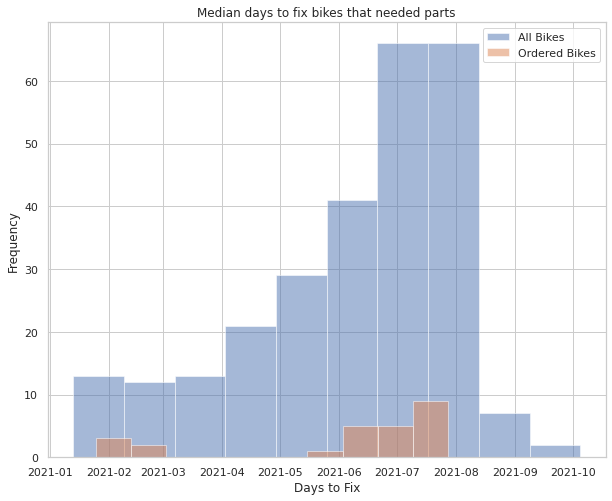

In [42]:
# Calculate the median days to fix for the entire dataset and the ordered bikes
median_all_bikes = df['Fixed_Date'].median()
median_ordered_bikes = ordered_df['Fixed_Date'].median()

# Create a histogram of days to fix for all bikes and ordered bikes
plt.figure(figsize=(10,8))
plt.hist(df['Fixed_Date'], alpha=0.5, label='All Bikes')
plt.hist(ordered_df['Fixed_Date'], alpha=0.5, label='Ordered Bikes')
plt.xlabel('Days to Fix')
plt.ylabel('Frequency')
plt.title('Median days to fix bikes that needed parts')
plt.legend()
plt.show()


# Key Performance Indicators (KPIs)

### Mean Time to Repair (MTTR)
Using the key performance indicator of MTTR, we can find the average time of the time a product is broken till the time to when its fixed using a weekly average to show the productivity of the mechancis fixing the bikes over time with the domain knowledge of summer months being the busiest.   

In [43]:
# Calculate the MTTR (Mean Time to Repair)
mttr = df['Fixed_Days'].mean()
print(f"The Mean Time To Repair for the entire dataset (MTTR) is {mttr:.0f} days.")


The Mean Time To Repair for the entire dataset (MTTR) is 18 days.


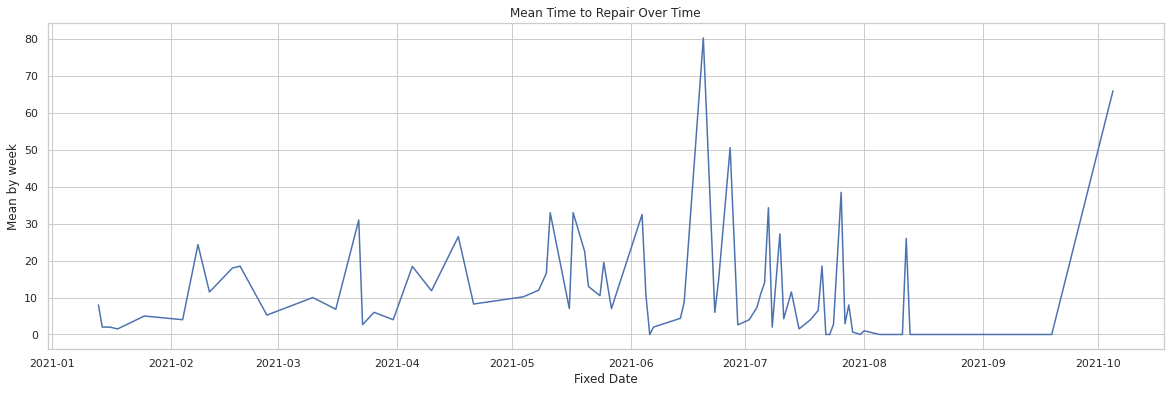

In [44]:
# Group the data by date and calculate the MTTR for each date
mttr_by_date = df.groupby('Fixed_Date')['Fixed_Days'].mean()

# Create a time series plot of the MTTR over time
plt.figure(figsize=(20,6))
plt.plot(mttr_by_date.index, mttr_by_date.values)
plt.xlabel('Fixed Date')
plt.ylabel('Mean by week')
plt.title('Mean Time to Repair Over Time')
plt.show()

# Repair Success 
Using the product Unique Identifier column we can see how the number of repairs 

In [45]:
df.head()

,Location,Down_Date,Product,Description,Mechanic_Notes,Status,PartComment,Product_Num,Category,Fixed_Date,Mechanic,YearMonth,Fixed_Days,product_id,MovingAverage,Down_Date_ordinal,Has_Tire,Has_Chain,Has_Brake
73,Edinger,2020-12-30,Double Surrey,Bald tires,nan,Done,nan,3,Down,2021-06-27,Robert Mounce,2020-12,179,Edinger_Double Surrey_3,NaN,737789,True,False,False
76,Yorba,2020-12-31,Swan Boat,Tipping on left side,nan,Done,nan,4,Down,2021-01-13,NaN,2020-12,13,Yorba_Swan Boat_4,NaN,737790,False,False,False
78,Waterfront,2021-01-05,Single Surrey,Brake adjustment,nan,Done,nan,6,Down,2021-06-20,NaN,2021-01,166,Waterfront_Single Surrey_6,NaN,737795,False,False,False
82,Yorba,2021-01-07,Double Surrey,Back passenger side metal scrapping😰,nan,Done,nan,8,Down,2021-06-27,Robert Mounce,2021-01,171,Yorba_Double Surrey_8,NaN,737797,False,False,False
89,Yorba,2021-01-10,Double Surrey,Loud screeching while pedaling,nan,Done,nan,8,Down,2021-01-13,NaN,2021-01,3,Yorba_Double Surrey_8,NaN,737800,False,False,False


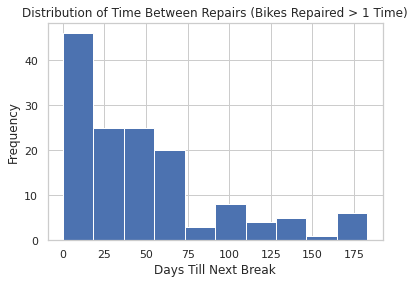

In [46]:
# Group the data by unique bike and count the number of repairs
num_repairs = df.groupby('product_id').size()

# Filter the data to only include bikes that have been repaired more than once
filtered_data = df[df['product_id'].isin(num_repairs[num_repairs > 1].index)]

# Sort the data by bike and repair date
filtered_data.sort_values(['product_id', 'Fixed_Date'], inplace=True)

# Calculate the time between each repair for each bike
filtered_data['Time_To_Next_Break'] = filtered_data.groupby('product_id')['Down_Date'].diff()

# Convert the time difference to days 
filtered_data['Time_To_Next_Break'] = filtered_data['Time_To_Next_Break'].dt.days

# Drop the first row for each bike (since it doesn't have a previous repair date)
filtered_data = filtered_data.groupby('product_id').apply(lambda x: x.iloc[1:])

# Check for and handle negative time differences
filtered_data['Time_To_Next_Break'] = filtered_data['Time_To_Next_Break'].apply(lambda x: x if x >= 0 else None)

# Drop rows where 'Time_To_Next_Break' is None (negative values)
filtered_data = filtered_data.dropna(subset=['Time_To_Next_Break'])

# Plot the distribution of time between repairs
plt.hist(filtered_data['Time_To_Next_Break'], bins=10)
plt.xlabel('Days Till Next Break')
plt.ylabel('Frequency')
plt.title('Distribution of Time Between Repairs (Bikes Repaired > 1 Time)')
plt.show()

Text(0.5, 1.0, 'Distribution of Time Between Repairs (Bikes Repaired > 4 Times)')

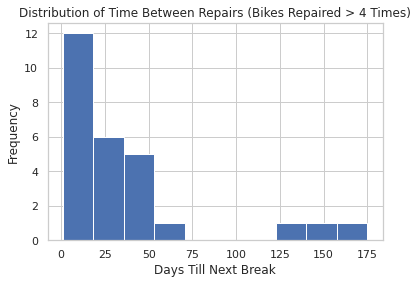

In [47]:
# Filter the data to only include bikes that have been repaired more than twice
filtered_data = df[df['product_id'].isin(num_repairs[num_repairs > 4].index)]

# Sort the data by bike and repair date
filtered_data.sort_values(['product_id', 'Fixed_Date'], inplace=True)

# Calculate the time between each repair for each bike
filtered_data['Time_To_Next_Break'] = filtered_data.groupby('product_id')['Down_Date'].diff()

# Convert the time difference to days 
filtered_data['Time_To_Next_Break'] = filtered_data['Time_To_Next_Break'].dt.days

# Drop the first two rows for each bike (since they don't have two previous repair dates)
filtered_data = filtered_data.groupby('product_id').apply(lambda x: x.iloc[4:])

# Check for and handle negative time differences
filtered_data['Time_To_Next_Break'] = filtered_data['Time_To_Next_Break'].apply(lambda x: x if x >= 0 else None)

# Drop rows where 'Time_To_Next_Break' is None (negative values)
filtered_data = filtered_data.dropna(subset=['Time_To_Next_Break'])

# Plot the distribution of time between repairs
plt.hist(filtered_data['Time_To_Next_Break'], bins=10)
plt.xlabel('Days Till Next Break')
plt.ylabel('Frequency')
plt.title('Distribution of Time Between Repairs (Bikes Repaired > 4 Times)')

## Explanation:
> ### Looking at this histogram in how bikes when fixed would break again would break down again and the space between them was mostly within the same month.
> I wonder if I can narrow my scope within a month 

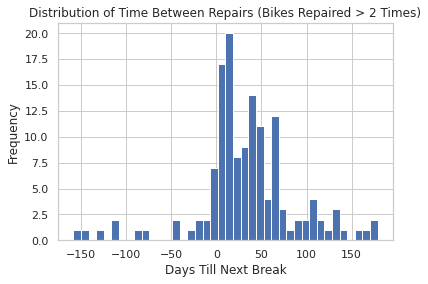

In [48]:
# Group the data by unique bike and count the number of repairs
num_repairs = df.groupby('product_id').size()

# Filter the data to only include bikes that have been repaired more than 2 times
filtered_data = df[df['product_id'].isin(num_repairs[num_repairs > 2].index)]

# Sort the data by bike and repair date
filtered_data.sort_values(['product_id', 'Fixed_Date'], inplace=True)

# Calculate the time between each repair for each bike
filtered_data['Time_To_Next_Break'] = filtered_data.groupby('product_id')['Down_Date'].diff()

# Convert the time difference to days 
filtered_data['Time_To_Next_Break'] = filtered_data['Time_To_Next_Break'].dt.days

# Drop the first row for each bike (since it doesn't have a previous repair date)
filtered_data = filtered_data.groupby('product_id').apply(lambda x: x.iloc[1:])

# Plot the distribution of time between repairs
plt.hist(filtered_data['Time_To_Next_Break'], bins=40)
plt.xlabel('Days Till Next Break')
plt.ylabel('Frequency')
plt.title('Distribution of Time Between Repairs (Bikes Repaired > 2 Times)')
plt.show()

# The Most Prone Bike to Break 

In [49]:
# Create the 'product_id' column by combining 'Location', 'Product', and 'Product_Num'
df['product_id'] = df['Location'].astype(str) + '_' + df['Product'].astype(str) + '_' + df['Product_Num'].astype(str)

# Group the data by 'product_id' and count the number of repairs (number of times it was broken)
df['num_repairs'] = df.groupby('product_id')['product_id'].transform('size')

# Sort the result in descending order to find the most repaired bike
most_repaired_bike = df['product_id'].value_counts().index[0]
most_repaired_count = df['num_repairs'].max()

print(f"The bike with the most repairs is {most_repaired_bike}, repaired {most_repaired_count} times.")

The bike with the most repairs is Edinger_Quad Sport_1, repaired 10 times.


## Park Attendence

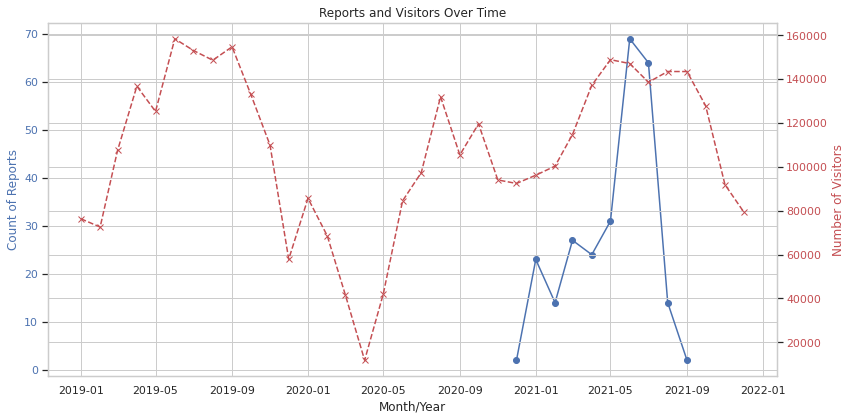

In [50]:
# Convert 'YearMonth' and 'Mon/ Year' to datetime
df['YearMonth'] = pd.to_datetime(df['YearMonth'], format='%Y-%m')
pk['Mon/Year'] = pd.to_datetime(pk['Mon/Year'], format='%m/%Y')

# Count the reports by 'YearMonth'
reports_count = df.groupby('YearMonth').size()

# Ensure 'Visitors/ Month' is treated as a string, remove commas, and convert to int64
pk['Visitors/Month'] = pk['Visitors/Month'].astype(str).str.replace(',', '').astype('int64')

# Sum visitors by 'Mon/ Year'
visitors_sum = pk.groupby('Mon/Year')['Visitors/Month'].sum()

# Plotting the dual-axis graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the reports count on the first y-axis
ax1.plot(reports_count.index, reports_count, marker='o', color='b', label='Reports')
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Count of Reports', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the visitors count on the second y-axis
ax2.plot(visitors_sum.index, visitors_sum, marker='x', linestyle='--', color='r', label='Visitors')
ax2.set_ylabel('Number of Visitors', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Customizing the plot
plt.title('Reports and Visitors Over Time')
fig.tight_layout()  # Adjust layout to prevent overlap

# Display the plot
plt.show()


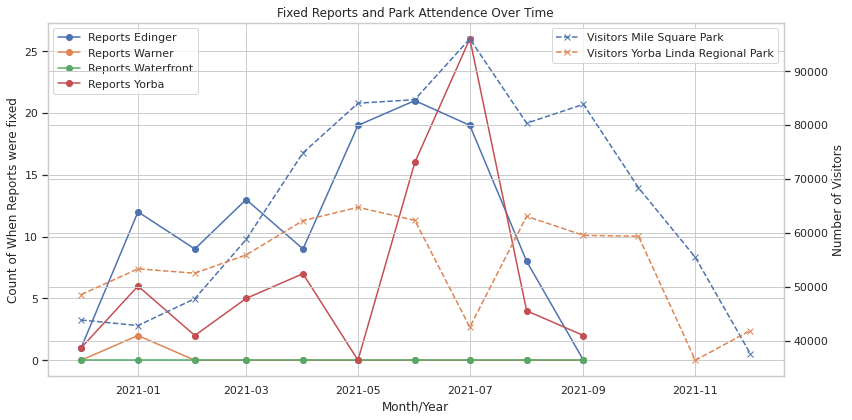

In [51]:
# Filter the data to the range from '2021-05-01' to '2021-08-31'
df_summer = df[(df['Fixed_Date'] >= '2021-05-01') & (df['Fixed_Date'] <= '2021-08-31')]
pk_summer = pk[(pk['Mon/Year'] >= '2021-05') & (pk['Mon/Year'] <= '2021-08')]

# Filter out waterfront since we dont have the attendence
df_summer = df[df['Location'] != 'Waterfront']

# Group by 'Down_Date' and count the reports
reports_count = df_summer.groupby('Fixed_Date').size()

# Sum visitors by 'Date'
visitors_sum = pk_summer.groupby('Mon/Year')['Visitors/day'].sum()

# Filter 'pk' to start from '2020-12'
pk = pk[pk['Mon/Year'] >= '2020-12-01']
# Group by 'YearMonth' and 'Location' and count the reports
reports_count = df_summer.groupby(['YearMonth', 'Location']).size().unstack(fill_value=0)

# Group by 'Mon/ Year' and 'Park' and sum the visitors
visitors_sum = pk.groupby(['Mon/Year', 'Park'])['Visitors/Month'].sum().unstack(fill_value=0)

# Plotting the dual-axis graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the reports count on the first y-axis for each location
for location in reports_count.columns:
    ax1.plot(reports_count.index, reports_count[location], marker='o', label=f'Reports {location}')
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Count of When Reports were fixed')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the visitors count on the second y-axis for each park
for park in visitors_sum.columns:
    ax2.plot(visitors_sum.index, visitors_sum[park], marker='x', linestyle='--', label=f'Visitors {park}')
ax2.set_ylabel('Number of Visitors')
ax2.legend(loc='upper right')

# Customizing the plot
plt.title('Fixed Reports and Park Attendence Over Time')
fig.tight_layout()  # Adjust layout to prevent overlap

# Display the plot
plt.show()

## Correlation

Correlation Matrix:
                  Reports_Count  Monthly_Visitors
Reports_Count          1.000000          0.360586
Monthly_Visitors       0.360586          1.000000


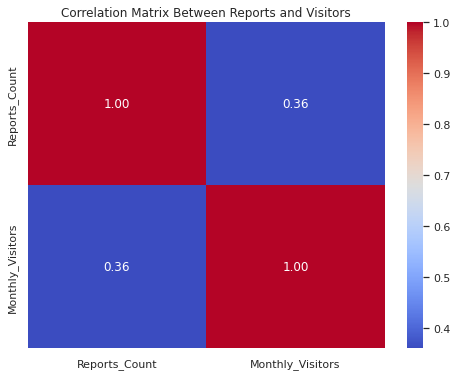

In [52]:
# Seperate by location
filtered_df = df[df['Location'].str.contains('Edinger|Warner|Yorba', case=False, na=False)]
# Aggregate data by date
reports_count = filtered_df.groupby('YearMonth').size().reset_index(name='Reports_Count')
visitors_sum = pk.groupby('Mon/Year')['Visitors/Month'].sum().reset_index(name='Monthly_Visitors')

# Merge the two datasets on date
merged_df = pd.merge(reports_count, visitors_sum, left_on='YearMonth', right_on='Mon/Year').drop(columns=['Mon/Year'])

# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Between Reports and Visitors')
plt.show()

> ### A correlation of *0.36* is a *weak to moderate relationaship* between monthly visitors and monthly reports

Summer time Correlation Matrix:
                  Reports_Count  Monthly_Visitors
Reports_Count          1.000000         -0.478295
Monthly_Visitors      -0.478295          1.000000


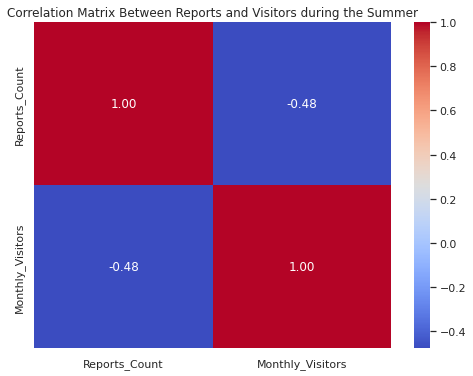

In [53]:
# Aggregate data by date
reports_count = df_summer.groupby('YearMonth').size().reset_index(name='Reports_Count')
visitors_sum = pk_summer.groupby('Mon/Year')['Visitors/Month'].sum().reset_index(name='Monthly_Visitors')

# Merge the two datasets on date
merged_df = pd.merge(reports_count, visitors_sum, left_on='YearMonth', right_on='Mon/Year').drop(columns=['Mon/Year'])

# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Display the correlation matrix
print("Summer time Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Between Reports and Visitors during the Summer')
plt.show()

> #### A correlation of **-0.48** indicates a *moderate inverse relationship* between the reports and the amount of visitors in the park, where an increase in park attendence is associated with a decrease in the reports during the **SUMMER (BUSY)** months

## Does the average time taken to fix a bike differ significantly between locations 
(Yorba and Edinger)

In [54]:
# t-test comparing means of repair times between Edinger and Yorba locations
Edinger = df[df['Location'] == 'Edinger']['Fixed_Days']
Yorba = df[df['Location'] == 'Yorba']['Fixed_Days']

t_stat, p_value = stats.ttest_ind(Edinger, Yorba)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Decision based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in repair times.")
else:
    print("Fail to reject the null hypothesis. No significant difference in repair times.")

T-statistic: 1.2883594196794772, P-value: 0.1992930295959317
Fail to reject the null hypothesis. No significant difference in repair times.


In [55]:
# Continue my Statistical Analysis in R Studio
# Export the cleaned data to a CSV file
df.to_csv('Repair_data.csv', index=False)

In [56]:
# Export the cleaned data to a CSV file
pk.to_csv('Park_data.csv', index=False)